In [1]:
# Importing Required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure

In [2]:
import datetime

In [3]:
# Reading Files
prod_t_df = pd.read_csv('pt.csv',low_memory=False)
stop_t_df = pd.read_csv('st.csv',low_memory=False,error_bad_lines=False)

In [4]:
# Selecting RingFrame Machines in Code 'C'
unit_code = 'C'
hank_df = prod_t_df[['pt_date','pt_count','pt_ucode','pt_mcode','pt_hanks']]
hank_df = hank_df[hank_df['pt_ucode']== unit_code]
hank_df = hank_df [hank_df.pt_mcode.str.contains('^RF')]
hank_df.pt_mcode.unique()

array(['RF-47', 'RF-34', 'RF-10', 'RF-08', 'RF-48', 'RF-02', 'RF-06',
       'RF-21', 'RF-25', 'RF-18', 'RF-33', 'RF-31', 'RF-28', 'RF-19',
       'RF-30', 'RF-39', 'RF-24', 'RF-16', 'RF-03', 'RF-45', 'RF-35',
       'RF-22', 'RF-07', 'RF-26', 'RF-11', 'RF-46', 'RF-36', 'RF-17',
       'RF-41', 'RF-40', 'RF-27', 'RF-23', 'RF-12', 'RF-01', 'RF-37',
       'RF-42', 'RF-32', 'RF-38', 'RF-04', 'RF-09', 'RF-13', 'RF-29',
       'RF-05', 'RF-43', 'RF-14', 'RF-20', 'RF-44', 'RF-15'], dtype=object)

In [5]:
hank_df.pt_count.unique()

array(['50 CK', '50s CKC', '50s CHPREM -S', '60sCKCPREM-S',
       '60s CH5* - P', '50sCKCPREM-P', '60s CH5* - S', '60s CK',
       '42s CKC', '50s CH5*', '45s CKC', '60CW-C', '60 CW', '62s CWC',
       '60sCWC-P-SILVER', '40s CKC', '60s CKC', '60s CWC-S-SILVER',
       '60s CWCP-S', '50s CWC', '62s CWC - P', '60CWC-P', '44 CKC'],
      dtype=object)

In [6]:
# Selecting  machine code and count code
rf_code = 'RF-01'
count_code = '40s CKC'
hank_df =  hank_df[hank_df.pt_date.str.contains('2018$')]
hank_df = hank_df[hank_df['pt_mcode']== rf_code] 
hank_df = hank_df[hank_df['pt_count']== count_code]
hank_df

,pt_date,pt_count,pt_ucode,pt_mcode,pt_hanks
8038,01-03-2018,40s CKC,C,RF-01,14.758636
8599,03-03-2018,40s CKC,C,RF-01,11.428476
11875,02-11-2018,40s CKC,C,RF-01,16.694447
19732,12-10-2018,40s CKC,C,RF-01,16.581758
25552,27-10-2018,40s CKC,C,RF-01,14.991416
26522,28-02-2018,40s CKC,C,RF-01,13.348265
26872,28-02-2018,40s CKC,C,RF-01,15.685664
28259,17-10-2018,40s CKC,C,RF-01,13.406156
28324,20-10-2018,40s CKC,C,RF-01,13.190502
28662,20-10-2018,40s CKC,C,RF-01,15.175695


In [7]:
data = hank_df

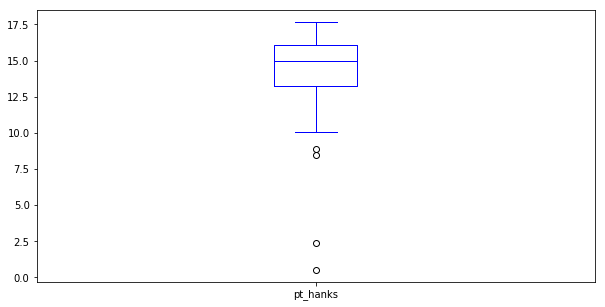

In [8]:
data['pt_hanks'].plot(kind='box', figsize=(10, 5), color='blue')

In [9]:
# Whole Year without shift sum
'''
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax.plot(data['pt_date'], data['pt_hanks'])
ax.set(xlabel='Date', ylabel='Hanks',
       title='Hanks during year')
ax.grid()
plt.show()
'''

"\nfig, ax = plt.subplots()\nfig.set_size_inches(10, 5)\nax.plot(data['pt_date'], data['pt_hanks'])\nax.set(xlabel='Date', ylabel='Hanks',\n       title='Hanks during year')\nax.grid()\nplt.show()\n"

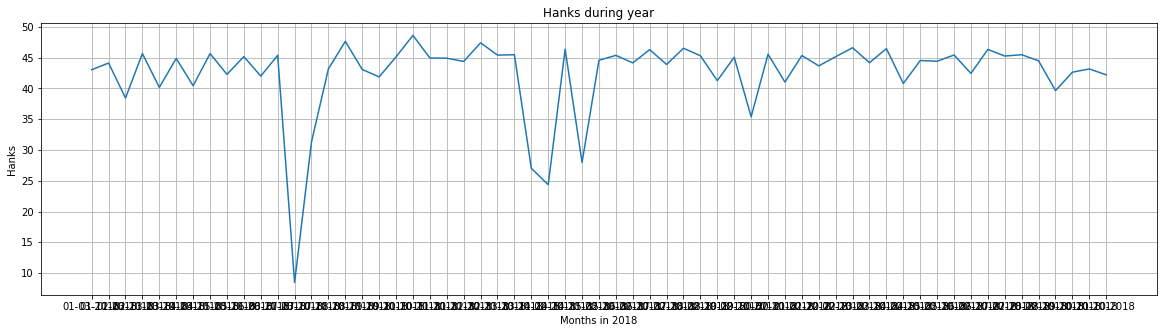

In [10]:
# Whole Year But Month Wise summation of shifts
grouped = data.groupby('pt_date', as_index=False)
grouped.groups
grouped = grouped['pt_hanks'].agg(np.sum)

fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
ax.plot(grouped['pt_date'], grouped['pt_hanks'])
ax.set(xlabel='Months in 2018', ylabel='Hanks',
       title='Hanks during year')
ax.grid()
plt.show()

In [11]:
grouped.dtypes

pt_date      object
pt_hanks    float64
dtype: object

In [12]:
#plotly Interactive Yearly Chart
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# plot([go.Scatter(x=grouped['pt_date'], y=grouped['pt_hanks'])])
trace = go.Scatter(
    x = grouped['pt_date'],
    y =  grouped['pt_hanks']
)
data = [trace]
plot(data)

'temp-plot.html'

In [176]:
#hank_df[(hank_df['pt_date'] > '2018-06-01') & (hank_df['pt_date'] < '2018-08-20')]

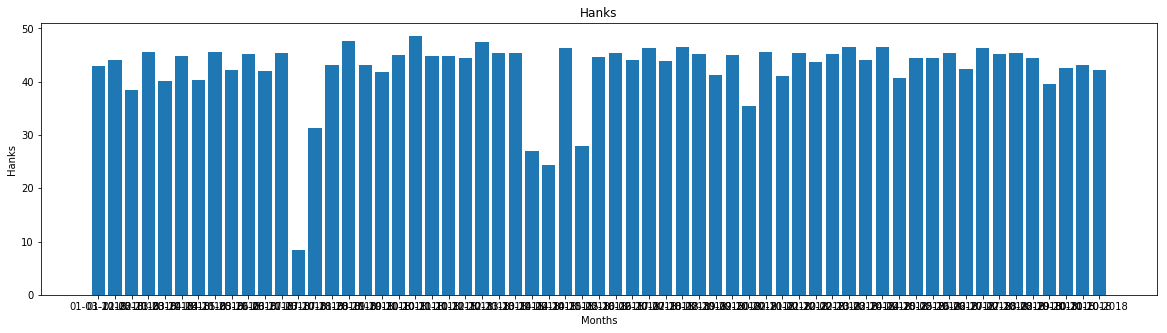

In [13]:
# Bar Plot Yearly Data LINE CHART
plt.figure(figsize=(20,5))
plt.bar(grouped['pt_date'], grouped['pt_hanks'])
plt.xlabel('Months', fontsize=10)
plt.ylabel('Hanks', fontsize=10)
plt.title('Hanks')
plt.show()

In [14]:
# plotly chart BAR CHART
data = [go.Bar(
           x = grouped['pt_date'],
           y =  grouped['pt_hanks']
    )]
plot(data)

'temp-plot.html'

In [15]:
#Monthly data
monthly_data = []
for i in range(1,13):
    mon_grouped_flags = grouped['pt_date'].map(lambda x: x.month) == i
    month = datetime.date(1900,i, 1).strftime('%B') 
    mon_grouped = grouped[mon_grouped_flags]
    monthly_data.append([month,sum(mon_grouped['pt_hanks'])])
mon_df = pd.DataFrame(monthly_data, columns = ['month', 'hanks']) 
mon_df
plot([go.Bar(
            x=mon_df['month'],
            y=mon_df['hanks']
    )])

AttributeError: 'str' object has no attribute 'month'